In [ ]:
x_train = [[0], [1], [2], [3]]
y_train = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
print(f'클래스의 종류:{neigh.classes_}')
print(f'거리계산방법:{neigh.effective_metric_}')
print(f'훈련데이터 샘플 수:{neigh.n_samples_fit_}')

클래스의 종류:[0 1]
거리계산방법:euclidean
훈련데이터 샘플 수:4


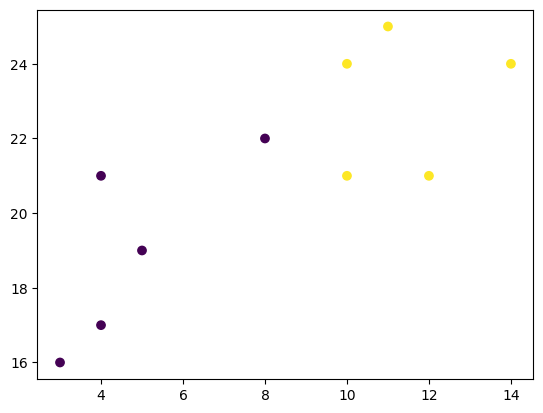

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)]


In [55]:
#원두맛에 대한 데이터 생성
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12] 
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]
plt.style.use('default')
plt.scatter(x, y, c=classes)
plt.show()
data = list(zip(x, y))
print(data)

[0]


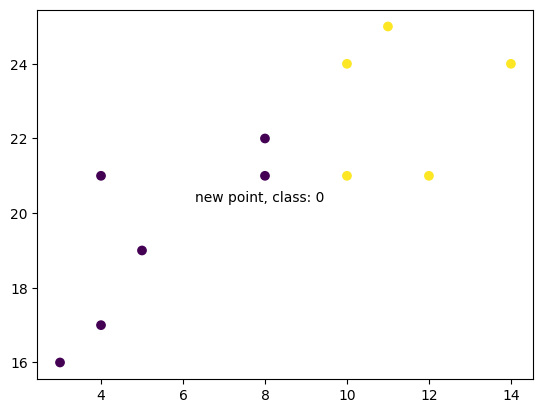

In [56]:
#k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data, classes)
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
print(prediction)
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

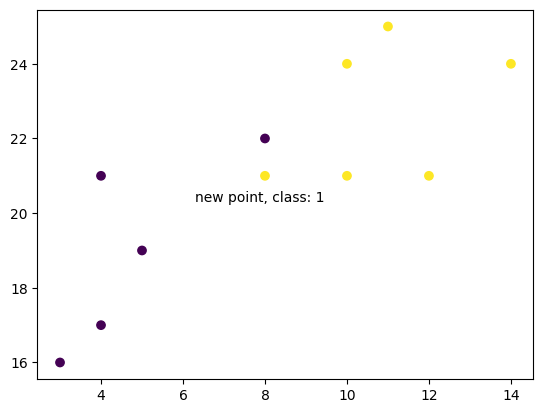

In [ ]:
#k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, classes)
prediction = knn.predict(new_point)
print(prediction)
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

In [ ]:
#교차검증으로 k찾기
from sklearn.model_selection import cross_val_score

knn=KNeighborsClassifier()
scores=cross_val_score(knn,data,classes,cv=3, scoring='accuracy')

for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 1.0
2번째 정확도: 1.0
3번째 정확도: 0.6666666666666666


In [ ]:
# 표준화 예제 데이터 생성
import pandas as pd
import numpy as np

df = pd.DataFrame({'A' : np.arange(11), 'B' : np.arange(11) ** 2})
df



,A,B
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


In [ ]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

df_standardScaled = standardScaler.fit_transform(df)

pd.DataFrame(df_standardScaled, columns = ['A_std', 'B_std'])

,A_std,B_std
0,-1.581139,-1.066004
1,-1.264911,-1.035546
2,-0.948683,-0.944175
3,-0.632456,-0.791888
4,-0.316228,-0.578688
5,0.000000,-0.304572
6,0.316228,0.030457
7,0.632456,0.426401
8,0.948683,0.883260
9,1.264911,1.401033


In [ ]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()

df_minmaxScaled = minmaxScaler.fit_transform(df)
pd.DataFrame(df_minmaxScaled, columns = ['A_minmax', 'B_minmax'])

,A_minmax,B_minmax
0,0.0,0.00
1,0.1,0.01
2,0.2,0.04
3,0.3,0.09
4,0.4,0.16
5,0.5,0.25
6,0.6,0.36
7,0.7,0.49
8,0.8,0.64
9,0.9,0.81


In [ ]:
#11.2 드라마분류하기
df=pd.read_csv('/content/chap11_movie_genre_final.csv')

In [ ]:
df.head()

,id,original_title,target,vote_average,Action,Adventure,Fantasy,ScienceFiction,Crime,Drama,...,Mystery,History,War,Music,Documentary,Foreign,TVMovie,director,cast,keywords
0,19995,Avatar,7,7.2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,James Cameron,"SamWorthington,SigourneyWeaver,StephenLang,Zoe...","['culture clash', 'future', 'space war', 'spac..."
1,285,Pirates of the Caribbean: At World's End,7,6.9,1,1,1,0,0,0,...,0,0,0,0,0,0,0,Gore Verbinski,"JohnnyDepp,KeiraKnightley,OrlandoBloom,Stellan...","['ocean', 'drug abuse', 'exotic island', 'east..."
2,206647,Spectre,6,6.3,1,1,0,0,1,0,...,0,0,0,0,0,0,0,Sam Mendes,"ChristophWaltz,DanielCraig,LéaSeydoux,RalphFie...","['spy', 'based on novel', 'secret agent', 'seq..."
3,49026,The Dark Knight Rises,8,7.6,1,0,0,0,1,1,...,0,0,0,0,0,0,0,Christopher Nolan,"AnneHathaway,ChristianBale,GaryOldman,MichaelC...","['dc comics', 'crime fighter', 'terrorist', 's..."
4,49529,John Carter,6,6.1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,Andrew Stanton,"LynnCollins,SamanthaMorton,TaylorKitsch,Willem...","['based on novel', 'mars', 'medallion', 'space..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4775 entries, 0 to 4774
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4775 non-null   int64  
 1   original_title  4775 non-null   object 
 2   target          4775 non-null   int64  
 3   vote_average    4775 non-null   float64
 4   Action          4775 non-null   int64  
 5   Adventure       4775 non-null   int64  
 6   Fantasy         4775 non-null   int64  
 7   ScienceFiction  4775 non-null   int64  
 8   Crime           4775 non-null   int64  
 9   Drama           4775 non-null   int64  
 10  Thriller        4775 non-null   int64  
 11  Animation       4775 non-null   int64  
 12  Family          4775 non-null   int64  
 13  Western         4775 non-null   int64  
 14  Comedy          4775 non-null   int64  
 15  Romance         4775 non-null   int64  
 16  Horror          4775 non-null   int64  
 17  Mystery         4775 non-null   i

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'movie count')

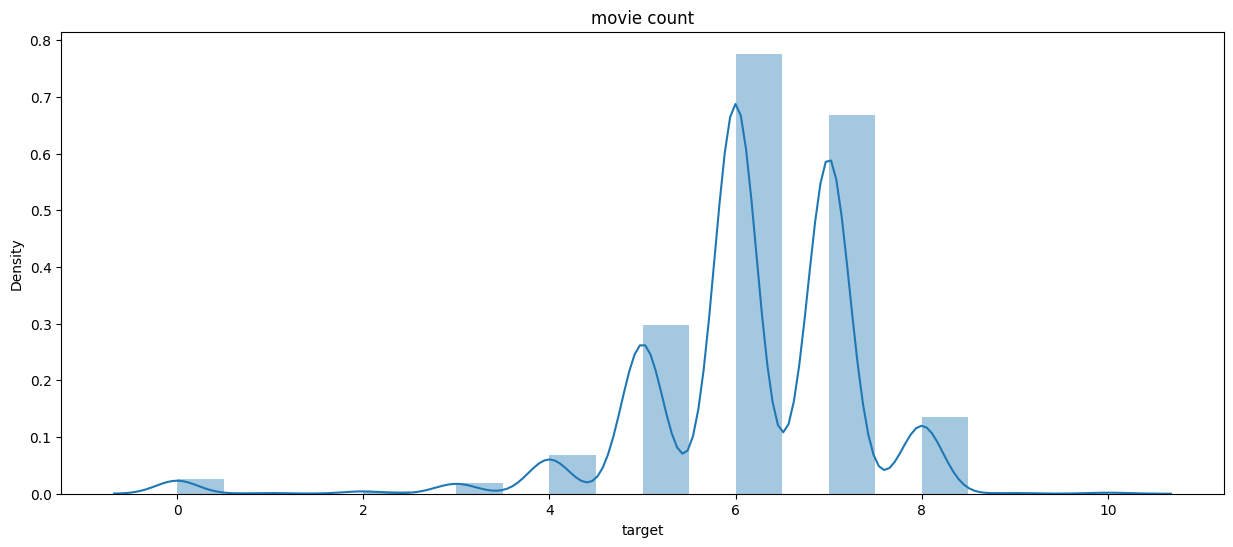

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 6)) #그래프사이즈
sns.distplot(df['target'] , bins = 20) #빈 수치를 20으로 설정

plt.title("movie count")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'vote_average')

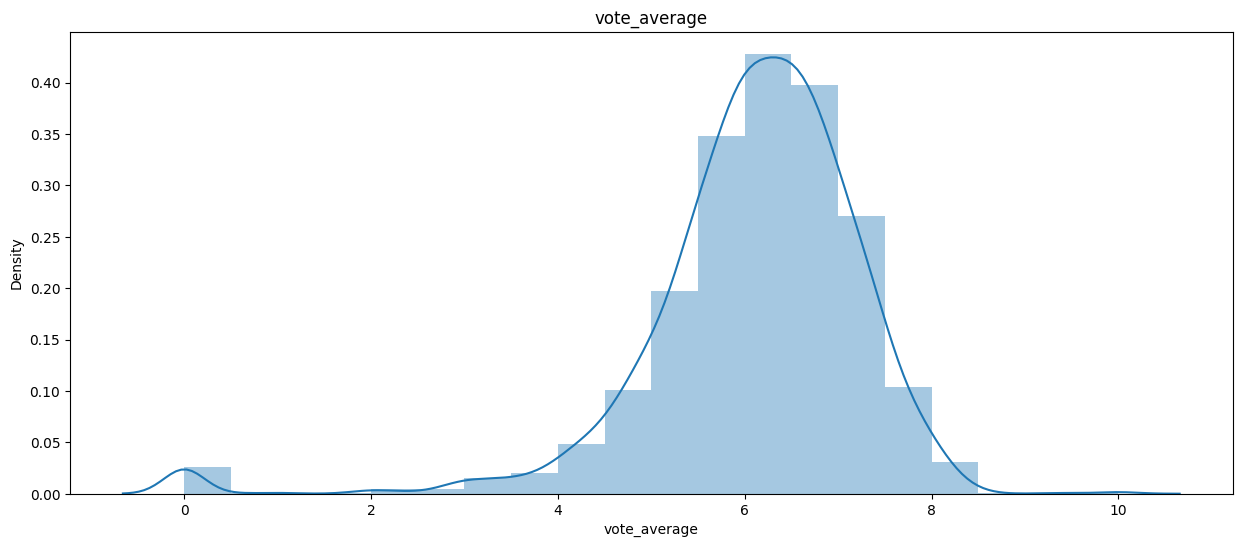

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 6)) #그래프사이즈
sns.distplot(df['vote_average'] , bins = 20) #빈 수치를 20으로 설정

plt.title("vote_average")

In [ ]:
print(df.columns)

Index(['id', 'original_title', 'target', 'vote_average', 'Action', 'Adventure',
       'Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation',
       'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery',
       'History', 'War', 'Music', 'Documentary', 'Foreign', 'TVMovie',
       'director', 'cast', 'keywords'],
      dtype='object')


In [ ]:
count_list=[]
genre_list=['Action', 'Adventure','Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation','Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery','History', 'War', 'Music', 'Documentary', 'Foreign', 'TVMovie']

for i in genre_list:
  count_list.append(len(df[df[i]==1]))

count_list

[1140,
 786,
 421,
 535,
 691,
 2281,
 1270,
 232,
 512,
 81,
 1714,
 891,
 518,
 347,
 191,
 143,
 184,
 110,
 33,
 8]

Action : 1140
Adventure : 786
Fantasy : 421
ScienceFiction : 535
Crime : 691
Drama : 2281
Thriller : 1270
Animation : 232
Family : 512
Western : 81
Comedy : 1714
Romance : 891
Horror : 518
Mystery : 347
History : 191
War : 143
Music : 184
Documentary : 110
Foreign : 33
TVMovie : 8


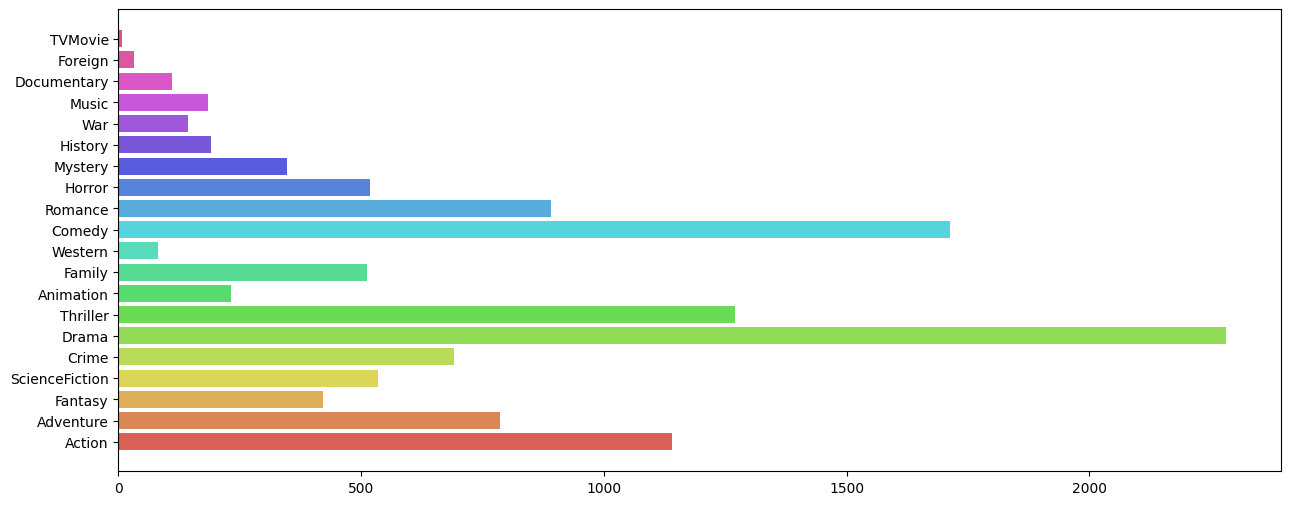

In [ ]:
plt.figure(1 , figsize = (15 , 6)) #그래프사이즈
plt.barh(genre_list,count_list,color=sns.color_palette('hls',20))

for i in range(len(genre_list)):
  print(f'{genre_list[i]} : {count_list[i]}')

In [ ]:
for i in range(len(genre_list)):
  print(f'{genre_list[i]} : {count_list[i]}')

Action : 1140
Adventure : 786
Fantasy : 421
ScienceFiction : 535
Crime : 691
Drama : 2281
Thriller : 1270
Animation : 232
Family : 512
Western : 81
Comedy : 1714
Romance : 891
Horror : 518
Mystery : 347
History : 191
War : 143
Music : 184
Documentary : 110
Foreign : 33
TVMovie : 8


In [ ]:
temp=(df.Drama==1)&(df.vote_average>=6.5)
df[temp]

print(f'드라마 장르 영화 2281편 중 평점 6.5 이상:{len(df[temp])}편')

드라마 장르 영화 2281편 중 평점 6.5 이상:1208편


In [ ]:
temp=(df.Comedy==1)&(df.vote_average>=6.5)
df[temp]
print(f'코메디 장르 영화 1714편 중 평점 6.5 이상:{len(df[temp])}편')

코메디 장르 영화 1714편 중 평점 6.5 이상:521편


In [ ]:
temp=(df.Thriller==1)&(df.vote_average>=6.5)
df[temp]
print(f'스릴러 영화 1270편 중 평점 6.5 이상:{len(df[temp])}편')

스릴러 영화 1270편 중 평점 6.5 이상:415편


In [ ]:
temp=(df.Action==1)&(df.vote_average>=6.5)
df[temp]
print(f'액션 영화 1140편 중 평점 6.5 이상:{len(df[temp])}편')

액션 영화 1140편 중 평점 6.5 이상:355편


In [ ]:
1208/2218

0.5446348061316502

In [ ]:
521/1714

0.3039673278879813

In [ ]:
415/1270

0.32677165354330706

In [ ]:
355/1140

0.31140350877192985

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x=df[['Action', 'Adventure', 'Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TVMovie']]
y=df[['target']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(3820, 20)
(955, 20)


In [ ]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier()
scores=cross_val_score(knn,x_train,y_train,cv=5, scoring='accuracy')

for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist

1번째 정확도: 0.38089005235602097
2번째 정확도: 0.34293193717277487
3번째 정확도: 0.3730366492146597
4번째 정확도: 0.3612565445026178
5번째 정확도: 0.3717277486910995


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh=KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)
print(neigh.classes_)
print(f'거리계산방법: {neigh.effective_metric_}')
print(f'샘플수: {neigh.n_samples_fit_}')


[ 0  1  2  3  4  5  6  7  8  9 10]
거리계산방법: euclidean
샘플수: 3820


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(neigh.score(x_test,y_test))

0.38010471204188484


In [ ]:
new_x = [1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

prediction = neigh.predict([new_x])
prediction

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([6])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
diabetes = datasets.load_diabetes()
x = diabetes.data[:150]
y = diabetes.target[:150]
knn=KNeighborsClassifier()

In [ ]:
scores=cross_val_score(knn,x,y,cv=3,scoring='accuracy')
for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 0.0
2번째 정확도: 0.0
3번째 정확도: 0.02


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


In [1]:
#11.3 농구선수 분류
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [10]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df=pd.read_csv('/content/drive/MyDrive/빅데이터시각화/chap11_basketball_final.csv')
df.head()

,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,4.1,1.9,0.4,0.4,1.3,0
1,2.4,3.7,1.1,0.5,1.6,0
2,2.2,1.0,0.5,0.3,1.0,0
3,1.9,0.8,0.6,0.1,1.0,1
4,2.5,0.3,0.3,0.4,0.8,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rebounds   1340 non-null   float64
 1   Assists    1340 non-null   float64
 2   Steals     1340 non-null   float64
 3   Blocks     1340 non-null   float64
 4   Turnovers  1340 non-null   float64
 5   Target     1340 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'player')

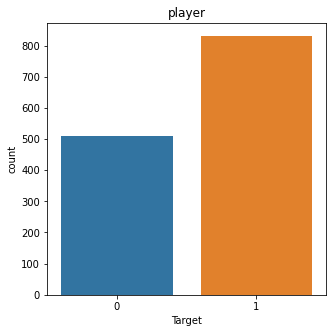

In [12]:
#경력별 선수의 수
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (5 , 5)) #그래프사이즈
sns.countplot(df['Target']) 
plt.title("player")

In [13]:
#경력에 따른 농구 기술
print(f"리바운드\n {df['Rebounds'].groupby(df['Target']).mean()}")
print(f"어시스트\n {df['Assists'].groupby(df['Target']).mean()}")
print(f"스틸\n {df['Steals'].groupby(df['Target']).mean()}")
print(f"블록\n {df['Blocks'].groupby(df['Target']).mean()}")
print(f"턴오버\n {df['Turnovers'].groupby(df['Target']).mean()}")

리바운드
 Target
0    2.247544
1    3.516486
Name: Rebounds, dtype: float64
어시스트
 Target
0    1.221022
1    1.752347
Name: Assists, dtype: float64
스틸
 Target
0    0.498232
1    0.692178
Name: Steals, dtype: float64
블록
 Target
0    0.253438
1    0.439110
Name: Blocks, dtype: float64
턴오버
 Target
0    0.942240
1    1.347533
Name: Turnovers, dtype: float64


In [14]:
#훈련데이터와 테스트데이터 분리
x=df[['Rebounds','Assists','Steals','Blocks','Turnovers']]
y=df[['Target']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(1072, 5)
(268, 5)


In [15]:
#최적의 k찾기
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier()
scores=cross_val_score(knn,x,y,cv=5, scoring='accuracy')

for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 0.6455223880597015
2번째 정확도: 0.6156716417910447
3번째 정확도: 0.5708955223880597
4번째 정확도: 0.6082089552238806
5번째 정확도: 0.6455223880597015


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [16]:
#모델 생성과 학습
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train, y_train)
print(neigh.classes_)
print(f'거리계산방법: {neigh.effective_metric_}')
print(f'샘플수: {neigh.n_samples_fit_}')

[0 1]
거리계산방법: euclidean
샘플수: 1072


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [17]:
print(neigh.score(x_test,y_test))
new_x = [3,3,2,2,4]
prediction = neigh.predict([new_x])
print(prediction)

0.6417910447761194
[1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [18]:
#연습문제3번
x = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(x, y)
print(neigh.predict([[1.1]]))

[0]


In [24]:
#연습문제4번
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
diabetes = datasets.load_diabetes()
x = diabetes.data[:150]
y = diabetes.target[:150]
knn=KNeighborsClassifier()
scores=cross_val_score(knn,x,y,cv=3,scoring='accuracy')
for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 0.0
2번째 정확도: 0.0
3번째 정확도: 0.02


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [27]:
#연습문제5번
df=pd.read_csv('/content/drive/MyDrive/빅데이터시각화/chap11_전복나이예측.csv')

In [28]:
df.head()

,Diameter,Height,Whole_Weight,Viscra_Weight,Shell_Weight,Group
0,0.525,0.195,1.3700,0.2955,0.407,2.0
1,0.275,0.095,0.2170,0.0435,0.090,1.0
2,0.470,0.165,0.9975,0.2420,0.330,0.0
3,0.450,0.140,1.0130,0.2160,0.360,0.0
4,0.380,0.135,0.6810,0.1420,0.170,0.0


In [29]:
df.columns

Index(['Diameter', 'Height', 'Whole_Weight', 'Viscra_Weight', 'Shell_Weight',
       'Group'],
      dtype='object')

In [36]:
x=df[['Diameter', 'Height', 'Whole_Weight', 'Viscra_Weight', 'Shell_Weight']]
y=df[['Group']]
knn=KNeighborsClassifier()
scores=cross_val_score(knn,x,y,scoring='accuracy')
for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 0.9950248756218906
2번째 정확도: 0.9900497512437811
3번째 정확도: 0.98
4번째 정확도: 0.985
5번째 정확도: 0.99


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [37]:
#연습문제6번
df=pd.read_csv('/content/drive/MyDrive/빅데이터시각화/chap11_유튜브장르.csv')
df.head()

,유튜버평균나이,먹방장면,장르
0,46.0,0.1750,a
1,44.0,0.1750,a
2,42.0,0.1625,a
3,41.0,0.1875,a
4,45.0,0.1750,a


In [39]:


from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x=df[['유튜버평균나이','먹방장면']]
y=df[['장르']]
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2,random_state=42)
knn=KNeighborsClassifier()
scores=cross_val_score(knn,x_train,y_train,scoring='accuracy')
for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 0.625
2번째 정확도: 0.5833333333333334
3번째 정확도: 0.7083333333333334
4번째 정확도: 0.6666666666666666
5번째 정확도: 0.5416666666666666


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [40]:
neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
print(f'정확도 : {neigh.score(x_test,y_test)}')

정확도 : 0.8333333333333334


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [41]:
#연습문제7번
df=pd.read_csv('/content/drive/MyDrive/빅데이터시각화/chap11_상권분류.csv')
df.head()

,income,cost,label
0,2850735,12120296344,3
1,3146942,8976116500,1
2,2774214,6175425196,2
3,2561943,1609692543,0
4,3001401,10437230074,1


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x=df[['income','cost']]
y=df[['label']]
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2,random_state=42)
knn=KNeighborsClassifier()
scores=cross_val_score(knn,x_train,y_train,scoring='accuracy')
for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

1번째 정확도: 0.9997708524289642
2번째 정확도: 0.99977079990832
3번째 정확도: 1.0
4번째 정확도: 1.0
5번째 정확도: 1.0


In [ ]:
neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
print(f'정확도 : {neigh.score(x_test,y_test)}')

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


정확도 : 1.0
